In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../utils")

from utils import load_csv

# Cấu hình hiển thị
sns.set_theme(style="whitegrid")
%matplotlib inline

In [7]:
symbols = ["fpt", "hpg", "vnm"]
dfs = {}
for symbol in symbols:
    path = f"../../data/clean/{symbol}.csv"
    dfs[symbol] = load_csv(path)

2025-05-27 19:30:02,931 - INFO - ✅ Load CSV thành công: ../../data/clean/fpt.csv | shape = (4551, 6)
2025-05-27 19:30:02,961 - INFO - ✅ Load CSV thành công: ../../data/clean/hpg.csv | shape = (4348, 6)
2025-05-27 19:30:02,996 - INFO - ✅ Load CSV thành công: ../../data/clean/vnm.csv | shape = (4783, 6)


In [8]:
def explore_basic_info(df: pd.DataFrame, name: str):
    print(f"\n📊 Thông tin cơ bản - {name.upper()}")
    print(df.info())
    print("\n📈 Mô tả thống kê:")
    print(df.describe())

In [9]:
# Cell 4: Gọi khám phá dữ liệu cho từng mã
for symbol, df in dfs.items():
    explore_basic_info(df, symbol)



📊 Thông tin cơ bản - FPT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4551 entries, 0 to 4550
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4551 non-null   object 
 1   open    4551 non-null   float64
 2   high    4551 non-null   float64
 3   low     4551 non-null   float64
 4   close   4551 non-null   float64
 5   volume  4551 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 213.5+ KB
None

📈 Mô tả thống kê:
              open         high          low        close        volume
count  4551.000000  4551.000000  4551.000000  4551.000000  4.551000e+03
mean     25.766221    26.044254    25.507310    25.777363  1.397713e+06
std      31.974559    32.318301    31.659323    32.004819  1.816347e+06
min       2.040000     2.150000     2.040000     2.110000  1.820000e+03
25%       6.085000     6.130000     6.030000     6.065000  2.817200e+05
50%      11.100000    11.220000    11.020000    11.1

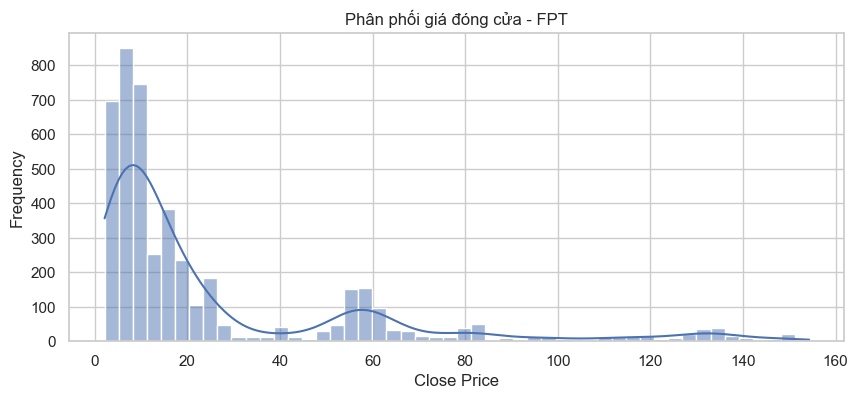

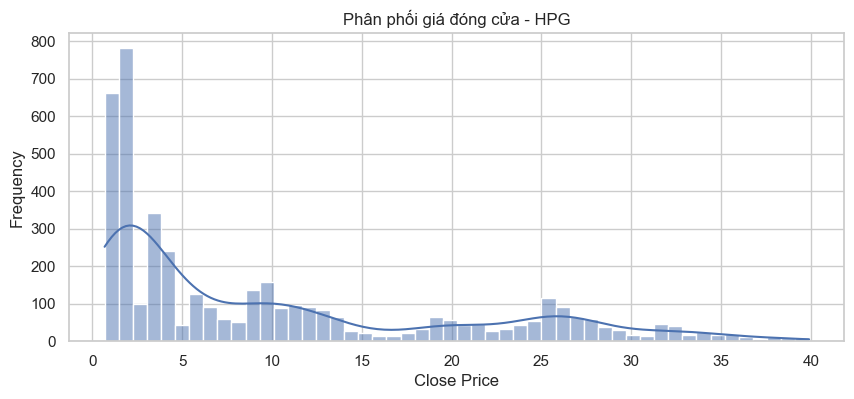

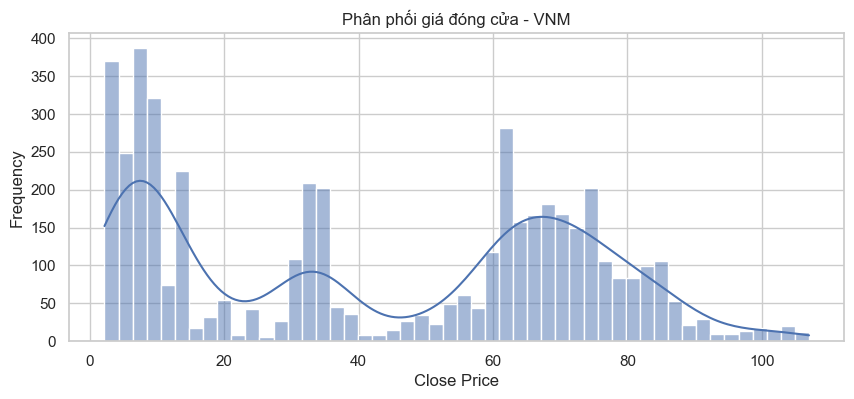

In [10]:
for symbol, df in dfs.items():
    plt.figure(figsize=(10, 4))
    sns.histplot(df["close"], kde=True, bins=50)
    plt.title(f"Phân phối giá đóng cửa - {symbol.upper()}")
    plt.xlabel("Close Price")
    plt.ylabel("Frequency")
    plt.show()


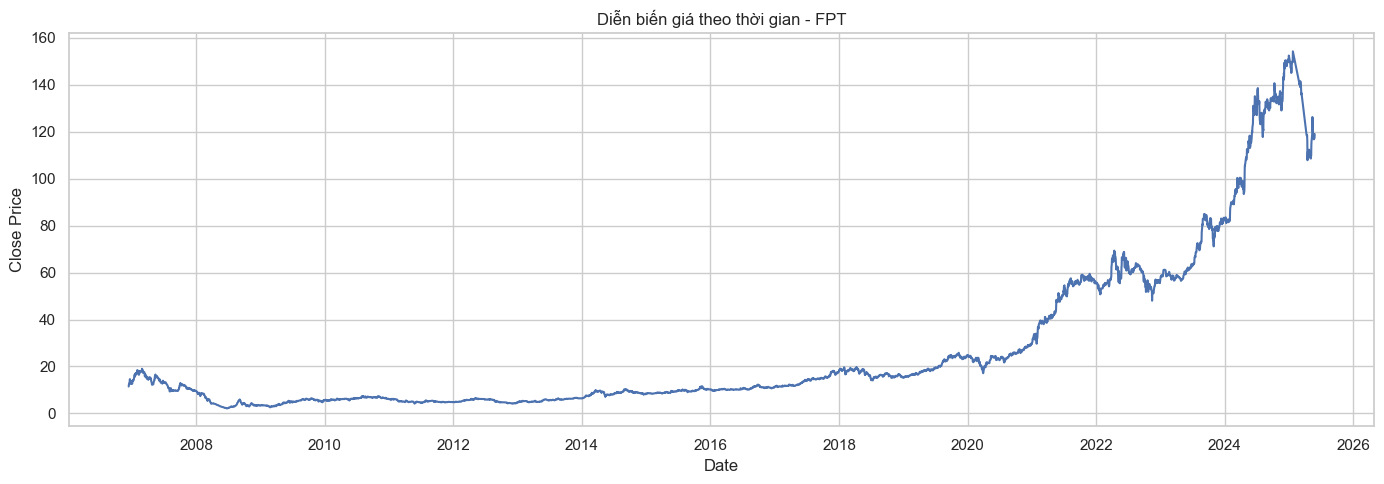

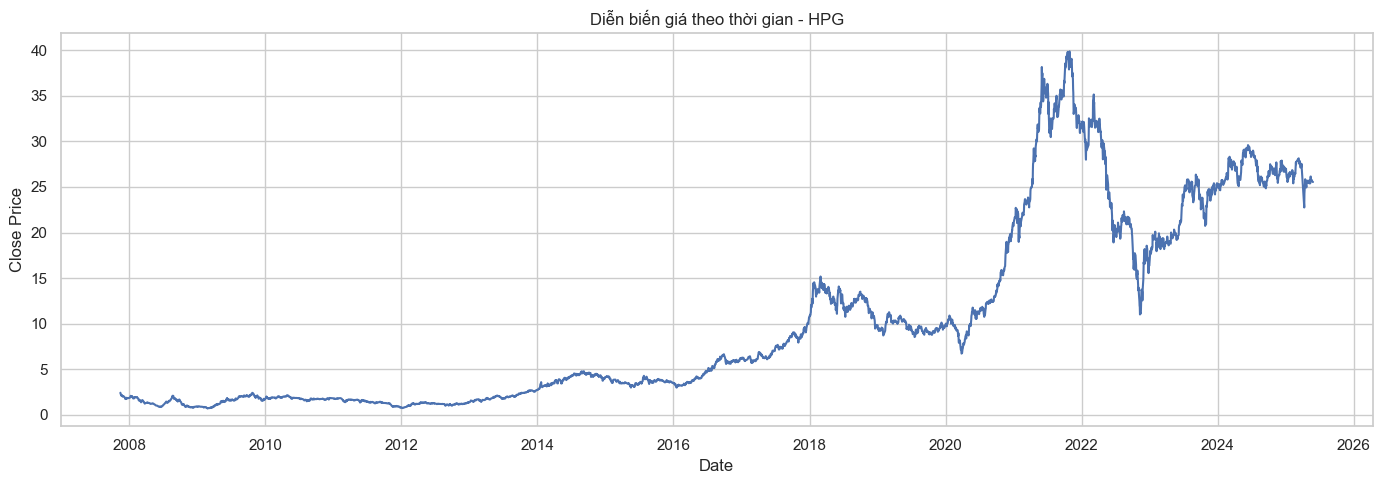

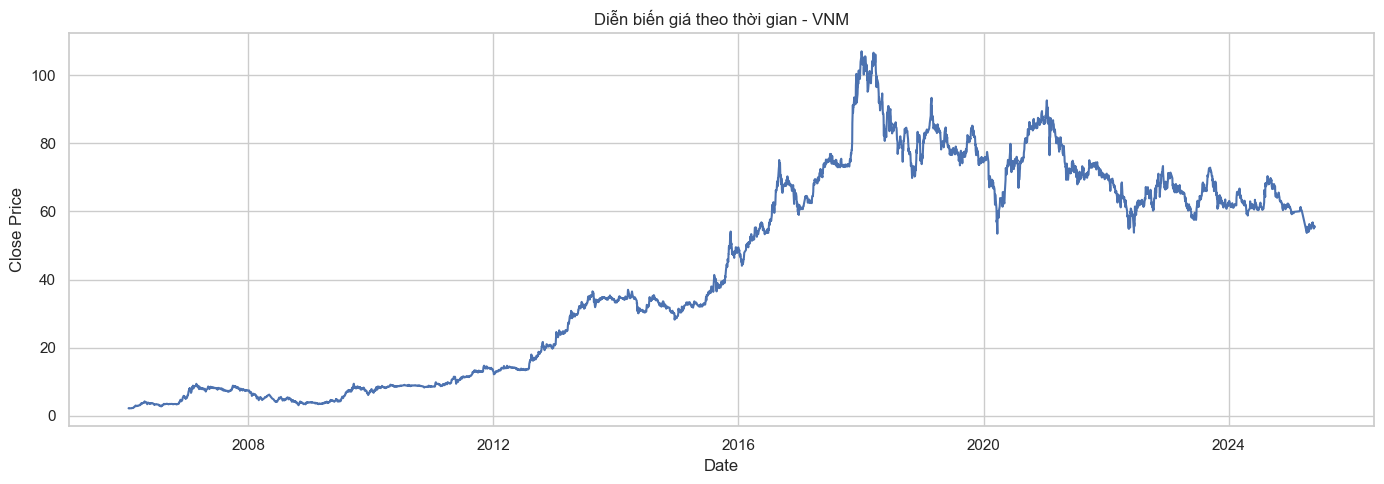

In [11]:
for symbol, df in dfs.items():
    plt.figure(figsize=(14, 5))
    plt.plot(pd.to_datetime(df["date"]), df["close"], label="Close")
    plt.title(f"Diễn biến giá theo thời gian - {symbol.upper()}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
